# Setup Future DBD DataFrames

This DataFrame will be used for predicting demand and ultimately recommending rates.

This notebooks makes use of the `generate_hotel_dfs` and `model_cancellations` functions found in `utils.py`.

In [1]:
import pandas as pd
import numpy as np
from dbds import generate_hotel_dfs
from sim import generate_simulation
from model_cancellations import predict_cancellations

In [2]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

## Hotel Capacities

H1: 187

H2: 226

Additional columns needed:

* Rooms/ADR booked running 30/90
* LY actual RS/ADR/Occ
* STLY OTB/ADR
* Rooms booked moving forward LY
* Rooms/ADR booked running 30/90 STLY
* OTB/ADR pace
* L30/L90 pace
* RevPAR


In [3]:
# %%time
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv", capacity=187)
# print("H1 complete.")
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv", capacity=226)

In [4]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")

In [5]:
h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

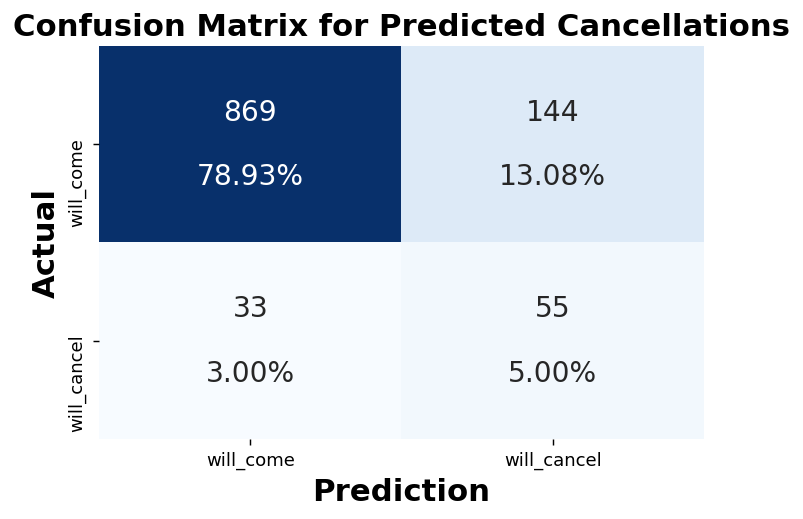

Optimal probability threshold (to maximize F-1): 0.68
F-1 Score: 0.383



In [6]:
df_res = predict_cancellations(h1_res, '2017-08-01', 1)


In [10]:
h1_res[h1_res.will_cancel==True]

,ResNum,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,LOS,CheckoutDate,...,NumPeople,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,MEAL_FB,MEAL_HB,MEAL_SC,MEAL_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,AgencyBooking,CompanyListed,DaysUntilArrival,cxl_proba,will_cancel
13153,13153,1,187,2017,August,31,2,2,8,2,0,0,FB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,261,NaN,0,Transient,193.10,0,0,No-Show,2017-08-02,2017-08-02,10,2017-08-12,...,2,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,1,0.917899,True
13159,13159,1,15,2017,August,31,3,0,2,2,0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,D,0,Refundable,240,NaN,0,Transient,229.00,0,1,Canceled,2017-08-01,2017-08-03,2,2017-08-05,...,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,False,True,False,False,False,False,False,False,False,False,0,1,True,False,2,0.956755,True
13160,13160,1,28,2017,August,31,3,0,2,2,0,0,BB,PHL,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,240,NaN,0,Transient,205.00,0,1,Canceled,2017-08-01,2017-08-03,2,2017-08-05,...,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,0,0,True,False,2,0.839209,True
13161,13161,1,28,2017,August,31,3,0,2,2,0,0,BB,PHL,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,240,NaN,0,Transient,205.00,0,1,Canceled,2017-08-01,2017-08-03,2,2017-08-05,...,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,0,0,True,False,2,0.839209,True
13163,13163,1,28,2017,August,31,3,0,2,2,0,0,BB,PHL,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,240,NaN,0,Transient,205.00,0,1,Canceled,2017-08-01,2017-08-03,2,2017-08-05,...,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,0,0,True,False,2,0.839209,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39969,39969,0,171,2017,August,35,27,2,5,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,75,NaN,0,Transient,121.50,0,0,Check-Out,2017-09-03,2017-08-27,7,2017-09-03,...,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,26,0.826392,True
40007,40007,0,33,2017,August,35,31,2,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,241,NaN,0,Transient,154.00,0,1,Check-Out,2017-09-05,2017-08-31,5,2017-09-05,...,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,30,0.734101,True
40024,40024,0,41,2017,August,35,29,2,6,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,177.50,0,2,Check-Out,2017-09-06,2017-08-29,8,2017-09-06,...,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,28,0.837356,True
40028,40028,0,43,2017,August,35,31,2,4,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,6,NaN,0,Transient,158.53,0,0,Check-Out,2017-09-06,2017-08-31,6,2017-09-06,...,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,True,False,30,0.805866,True


In [8]:
# add predictions back into original df, making sure indices align
h1_res.head(2)

,ResNum,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,LOS,CheckoutDate,...,NumPeople,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,MEAL_FB,MEAL_HB,MEAL_SC,MEAL_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,AgencyBooking,CompanyListed,DaysUntilArrival,cxl_proba,will_cancel
0,0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2015-07-01,...,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,False,False,-762,NaN,False
1,1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2015-07-01,...,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,False,False,-762,NaN,False


In [9]:
df_test.head(2)

NameError: name 'df_test' is not defined

In [ ]:
len(h1_res), len(h2_res)

In [ ]:
h1_res[h1_res.ArrivalDate == '2017-08-04'].IsCanceled.sum()

In [ ]:
h1_sim = generate_simulation(h1_dbd, "2017-08-01", 1, h1_res)

In [ ]:
h1_dbd.loc['2016-08-02', ["RoomsSold"]]

In [ ]:
# h1_sim.to_pickle("pickle/h1_sim_stly.pick")
# h1_sim.to_csv("pickle/h1_sim_stly.csv")

In [ ]:
h2_sim = generate_simulation(h2_dbd, "2017-08-01", 2, h2_res)

In [ ]:
# h2_sim.to_pickle("pickle/h2_sim_stly.pick")
# h2_sim.to_csv("pickle/h2_sim_stly.csv")

In [ ]:
h2_sim.head(5)

In [ ]:
h1_dbd.columns

# EW- Add cancels thus far OTB

By modifying sim.add_sim_cols?

In [ ]:
h1_sim.head(10)

In [ ]:
h1_dbd.loc["2017-08-01":"2017-08-31"].head(10)

In [ ]:
h1_sim.loc['2017-08-01', ["RoomsOTB", "LYA_RoomsSold", "STLY_OTB", "STLY_Date"]]

In [ ]:
import datetime

d1 = datetime.date(2020, 5, 5)
d2 = datetime.date(2020, 2, 5)